In [1]:
#Import useful functions
import warnings
warnings.filterwarnings("ignore")
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm
from sklearn.utils.multiclass import unique_labels
import itertools
from scipy import misc
import math
import os
import glob
import xlrd
import xlwt
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from PIL import Image
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import pylab as plt
import numpy as np
from scipy.signal import argrelextrema
from IPython.display import Image
import matplotlib.patches as patches
import matplotlib as matplotlib
import xlsxwriter
from xlrd import open_workbook
from xlutils.copy import copy
from sklearn.model_selection import train_test_split
from datetime import datetime
plt.style.use('fivethirtyeight')
import itertools
from fbprophet import Prophet
from scipy.interpolate import interp1d
from sklearn.preprocessing import StandardScaler
import xlrd

In [2]:
#Function Saves Forecast Graphs to New Sheet in Excel File
from openpyxl import load_workbook
from openpyxl.drawing.image import Image
def graphforecast(filenamefinal, imdir):
    imdir1= imdir+'/{}'
    for im in os.listdir(imdir):
        imname = im.split('.')[0]
        workbook = load_workbook(filename=filenamefinal)
        sheet = workbook.create_sheet(imname)
        logo = Image(imdir1.format(im))
        loc ='A1'
        sheet.add_image(logo, loc)
        workbook.save(filenamefinal)
    return filenamefinal

In [3]:
#Function Define Holidays for Forecasting Function
def holidaycreator():  
    
    blackfriday = pd.DataFrame({
        'holiday': 'black friday',
        'ds': pd.to_datetime(['2020-11-27','2019-11-29','2018-11-23', '2017-11-24']),
        'lower_window': 0,
        'upper_window': 1,})

    cybermon = pd.DataFrame({
        'holiday': 'cyber monday',
        'ds': pd.to_datetime(['2020-11-30','2019-12-02','2018-11-26', '2017-11-27']),
        'lower_window': 0,
        'upper_window': 1,})

    primeday = pd.DataFrame({
        'holiday': 'prime day',
        'ds': pd.to_datetime(['2020-07-13','2020-07-14','2019-07-15','2019-07-16','2018-07-16',
                              '2017-07-10','2017-07-11','2017-07-12']),
        'lower_window': 0,
        'upper_window': 1,})

    holidays=pd.concat((blackfriday, cybermon, primeday))
    return holidays

**Must Specify Foldername and Sheetname**

In [4]:
foldername = '/Users/JoyThompson/Desktop/Client Forecasting/LG/LG.xlsx'
sheetname='shipsales'

In [5]:
#Open Excel File and Read Sheet
monthlyrev=pd.read_excel(foldername, sheetname=sheetname)
#Create List of Dates
datesall=['2018-01-31','2018-02-28','2018-03-31','2018-04-30',
         '2018-05-31','2018-06-30','2018-07-31','2018-08-31','2018-09-30','2018-10-31','2018-11-30','2018-12-31','2019-01-31','2019-02-28','2019-03-31','2019-04-30',
         '2019-05-31','2019-06-30','2019-07-31','2019-08-31','2019-09-30','2019-10-31','2019-11-30','2019-12-31',
         '2020-01-31','2020-02-29','2020-03-31','2020-04-30','2020-05-31','2020-06-30','2020-07-31',
         '2020-08-31','2020-09-30','2020-10-31','2020-11-30','2020-12-31']
#Convert Dates to Datetime Format
datestopd=[]
for column in datesall:
        date=pd.to_datetime(column)
        datestopd.append(date)

In [6]:
print(monthlyrev)

         Date  Shipped Product Sales  Units Shipped
0  2018-01-01              118599.32           1995
1  2018-02-01               92173.47           1616
2  2018-03-01              105625.91           1898
3  2018-04-01               98099.49           1756
4  2018-05-01               85168.67           1499
5  2018-06-01               86767.50           1526
6  2018-07-01               88456.67           1542
7  2018-08-01               97099.50           1678
8  2018-09-01               82611.00           1454
9  2018-10-01               94456.00           1548
10 2018-11-01              108701.00           1672
11 2018-12-01              127878.50           1899
12 2019-01-01               89096.50           1361
13 2019-02-01               81855.50           1250
14 2019-03-01               98776.50           1531
15 2019-04-01               84406.00           1306
16 2019-05-01               90804.00           1464
17 2019-06-01               88702.00           1468
18 2019-07-0

**Must Select Appropriate Historical Data Input Dates**

In [7]:
datesinput=datestopd[0:22]

In [8]:
#Standardize Data and Format for Forecasting
revmatrix=monthlyrev.as_matrix(columns=['Shipped Product Sales'])
revtransformer = StandardScaler()
revtransformer.fit(revmatrix)
ystand = revtransformer.transform(revmatrix)
ylist=[]

countmonths=0
for ind in monthlyrev.index:
    rev=ystand[countmonths][0]
    ylist.append(float(rev))
    countmonths=countmonths+1
forecastin=pd.DataFrame({'ds': datesinput,'y':ylist})
print(forecastin)

           ds         y
0  2018-01-31  1.698302
1  2018-02-28 -0.459586
2  2018-03-31  0.638916
3  2018-04-30  0.024322
4  2018-05-31 -1.031585
5  2018-06-30 -0.901027
6  2018-07-31 -0.763093
7  2018-08-31 -0.057335
8  2018-09-30 -1.240440
9  2018-10-31 -0.273198
10 2018-11-30  0.890023
11 2018-12-31  2.456023
12 2019-01-31 -0.710846
13 2019-02-28 -1.302133
14 2019-03-31  0.079606
15 2019-04-30 -1.093863
16 2019-05-31 -0.571414
17 2019-06-30 -0.743060
18 2019-07-31  0.373648
19 2019-08-31  0.797096
20 2019-09-30  0.828371
21 2019-10-31  1.361272


**Specify Number of Projection Months and Confidence Interval Width**

In [9]:
intwidth=.75
projectmonths=14

In [10]:
#Forecast Data
holidays=holidaycreator()
p = Prophet(interval_width=intwidth, yearly_seasonality=True, growth='linear')
m=p.fit(forecastin);
future=m.make_future_dataframe(periods=projectmonths, freq='M')
pred=p.predict(future);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 16.


In [11]:
#Unstandardize Forecast
pred=pred[-13:]
pred0 = revtransformer.inverse_transform(pred['yhat'])
pred1 = revtransformer.inverse_transform(pred['yhat_upper'])
pred2 = revtransformer.inverse_transform(pred['yhat_lower'])

**Forecast**

In [12]:
forecastout=pd.DataFrame({'Month': pred['ds'], 'Revenue Forecast':pred0, 'Upper Bound Forecast':pred1,
                    'Lower Bound Forecast':pred2})
forecastout.set_index('Month')

,Revenue Forecast,Upper Bound Forecast,Lower Bound Forecast
Month,,,
2019-12-31,174915.845836,180898.668712,169325.580929
2020-01-31,78578.600247,85071.102951,72494.839327
2020-02-29,82298.024215,88723.645804,76119.225479
2020-03-31,94077.680555,100095.668172,87883.640845
2020-04-30,110169.213271,115983.692511,104107.135167
2020-05-31,77627.946120,83503.523302,71248.792845
2020-06-30,101265.183183,107328.383389,95013.498432
2020-07-31,93086.577228,98952.600134,87436.398227
2020-08-31,115933.039050,121685.825908,109845.379172


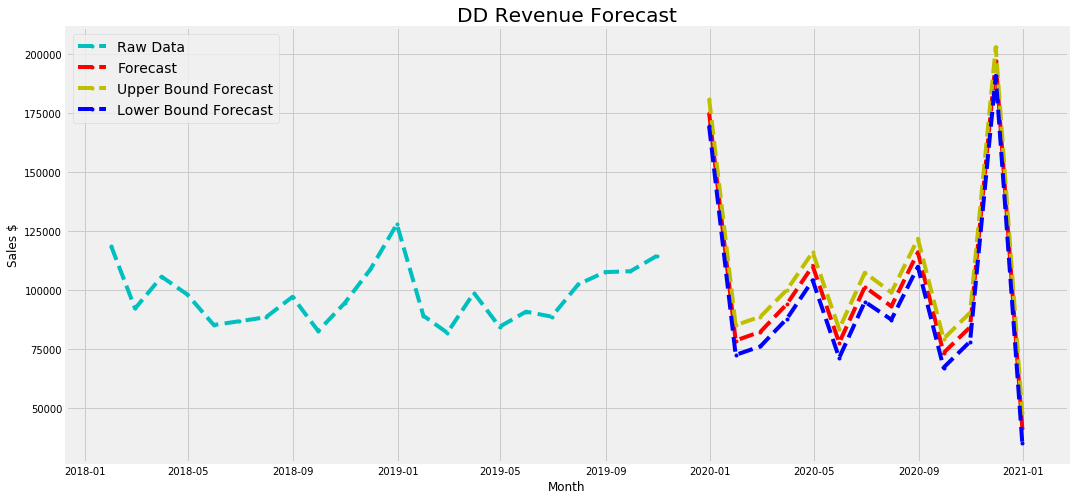

In [13]:
fig, axes = plt.subplots(1,1, figsize=(16,8));
plt.style.use('fivethirtyeight')
axes.plot_date(datesinput, monthlyrev['Shipped Product Sales'], '--.c');
axes.plot_date(pred['ds'],forecastout.loc[:,'Revenue Forecast'], '--.r');
axes.plot_date(pred['ds'],forecastout.loc[:,'Upper Bound Forecast'],'--.y');
axes.plot_date(pred['ds'],forecastout.loc[:,'Lower Bound Forecast'], '--.b');
axes.set_ylabel('Sales $');
axes.set_xlabel('Month');
axes.set_title('DD Revenue Forecast');
axes.legend(('Raw Data','Forecast', 'Upper Bound Forecast', 'Lower Bound Forecast'))

**Must Specify File Path to Save Graph Image and Image Name**

In [14]:
figfolder='/Users/JoyThompson/Desktop/Dammit Dolls/graphs/DDrevforecast.png'
fig.savefig(figfolder)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/JoyThompson/Desktop/Dammit Dolls/graphs/DDrevforecast.png'